# STA365 HW3

Q1:

Posterior Summary for θ:
Mean: -0.11451908575913027, Median: -0.11547309528297453, 95% Credible Interval: [-0.54023172  0.30922424]
Posterior Summary for τ:
Mean: 0.7761661004928307, Median: 0.7584564155690248, 95% Credible Interval: [0.43509989 1.22603439]


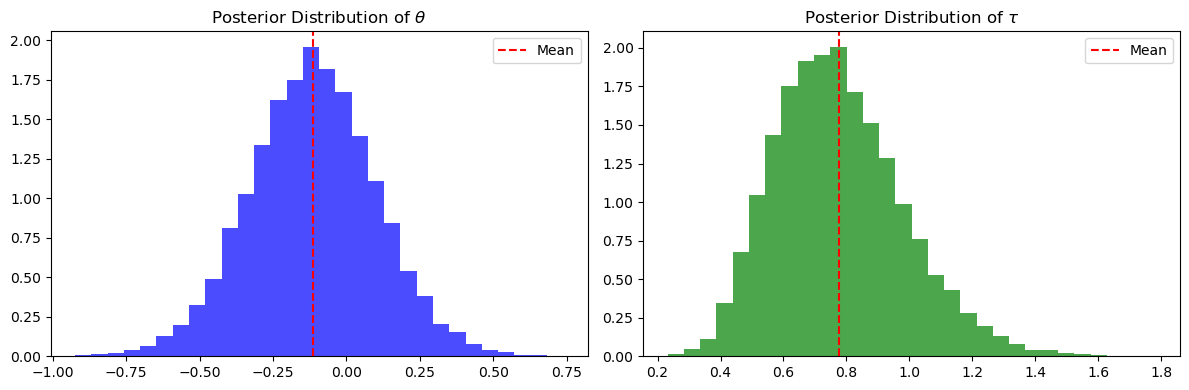

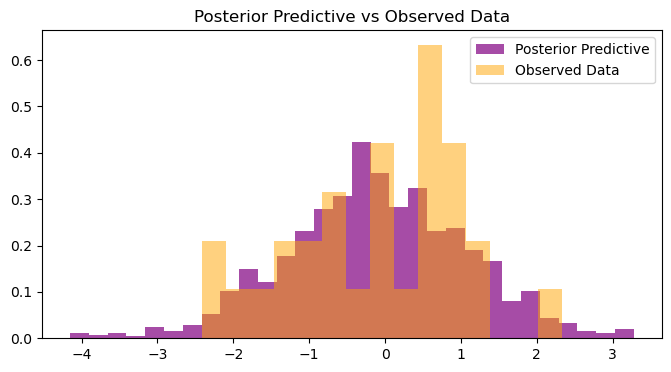

In [4]:
## import numpy as np
from scipy.stats import gamma, norm
import matplotlib.pyplot as plt

# Parameters
n = 30
m, s = 0, 1 
x = norm(loc=m, scale=s).rvs(size=n)  
C, G = 2, 10000 

# Initialize chains
theta = np.zeros([C, G])
tau = np.zeros([C, G])
theta[:, 0] = 1000

# Precomputations
x_bar = np.mean(x)

# Gibbs sampler
for c in range(C): 
    for g in range(1, G): 
        # Update tau (Gamma conditional)
        alpha = n / 2 
        beta = 0.5 * np.sum((x - theta[c, g - 1]) ** 2) 
        tau[c, g] = gamma(a=alpha, scale=1 / beta).rvs()
        
        # Update theta (Normal conditional)
        var_theta = 1 / (n * tau[c, g])  
        mean_theta = x_bar 
        theta[c, g] = norm(loc=mean_theta, scale=np.sqrt(var_theta)).rvs()

# Burn-in and thinning
burn_in = 2000
theta_samples = theta[:, burn_in:].flatten()  
tau_samples = tau[:, burn_in:].flatten()

# Posterior summaries
theta_mean = np.mean(theta_samples)
theta_median = np.median(theta_samples)
theta_credible = np.percentile(theta_samples, [2.5, 97.5])

tau_mean = np.mean(tau_samples)
tau_median = np.median(tau_samples)
tau_credible = np.percentile(tau_samples, [2.5, 97.5])

# Print results
print("Posterior Summary for θ:")
print(f"Mean: {theta_mean}, Median: {theta_median}, 95% Credible Interval: {theta_credible}")
print("Posterior Summary for τ:")
print(f"Mean: {tau_mean}, Median: {tau_median}, 95% Credible Interval: {tau_credible}")

# Plot posterior distributions
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].hist(theta_samples, bins=30, density=True, color='blue', alpha=0.7)
ax[0].set_title("Posterior Distribution of $\\theta$")
ax[0].axvline(theta_mean, color='red', linestyle='--', label="Mean")
ax[0].legend()

ax[1].hist(tau_samples, bins=30, density=True, color='green', alpha=0.7)
ax[1].set_title("Posterior Distribution of $\\tau$")
ax[1].axvline(tau_mean, color='red', linestyle='--', label="Mean")
ax[1].legend()

plt.tight_layout()
plt.show()

# Posterior predictive distribution
posterior_predictive_samples = norm(
    loc=np.random.choice(theta_samples, size=1000),
    scale=1 / np.sqrt(np.random.choice(tau_samples, size=1000))
).rvs()

# Plot posterior predictive distribution
plt.figure(figsize=(8, 4))
plt.hist(posterior_predictive_samples, bins=30, density=True, color='purple', alpha=0.7, label="Posterior Predictive")
plt.hist(x, bins=15, density=True, color='orange', alpha=0.5, label="Observed Data")
plt.title("Posterior Predictive vs Observed Data")
plt.legend()
plt.show()


Q2

$p(\tau \mid \theta, \mathbf{x}) \propto p(\mathbf{x} \mid \theta, \tau)p(\tau)$

$p(\tau \mid \theta, \mathbf{x}) \propto \tau^{n/2} e^{-\frac{\tau}{2} \sum_{i=1}^n (x_i - \theta)^2} \cdot \tau^{{\alpha/2} - 1} e^{-\frac{\lambda}{2}{\tau}}$

$p(\tau \mid \theta, \mathbf{x}) \propto \tau^{(n + \alpha)/2 - 1} e^{-\frac{\tau}{2} \left( \sum_{i=1}^n (x_i - \theta)^2 + \lambda \right)}$


$\tau \mid \theta, \mathbf{x} \sim \text{Gamma} \left( \frac{n + \alpha}{2}, \frac{\sum_{i=1}^n (x_i - \theta)^2 + \lambda}{2} \right)$

$p(\theta \mid \tau, \mathbf{x}) \propto p(\mathbf{x} \mid \theta, \tau)p(\theta)$

$p(\theta \mid \tau, \mathbf{x}) \propto e^{-\frac{\tau}{2} \sum_{i=1}^n (x_i - \theta)^2} \cdot e^{-\frac{\tau_0}{2} (\theta - \theta_0)^2}$

$p(\theta \mid \tau, \mathbf{x}) \propto e^{-\frac{\tau}{2} \left[n\theta^2 - 2n\bar{x}\theta + n\bar{x}^2\right]} \cdot e^{-\frac{\tau_0}{2} \left[\theta^2 - 2\theta\theta_0 + \theta_0^2\right]}$

$p(\theta \mid \tau, \mathbf{x}) \propto e^{-\frac{\tau}{2} \left[(n + \tau_0)\theta^2 - 2\theta(n\bar{x} + \tau_0\theta_0)\right]}$

$\theta \mid \tau, \mathbf{x} \sim \mathcal{N} \left( \frac{n\bar{x} + \tau_0\theta_0}{n + \tau_0}, \frac{1}{\tau(n + \tau_0)} \right)$

$\alpha/2$ indicates the equivalent number of prior data points influencing the posterior as compared to the data.
$\lambda/2$ is the prior's contribution to the variance of the posterior. A larger $\lambda$ indicates a smaller expected variance for the data.

Posterior θ: Mean=0.05989345199812939, 95% CI=[-0.27992121  0.39557715]
Posterior τ: Mean=1.1447975843423244, 95% CI=[0.64651084 1.7685285 ]


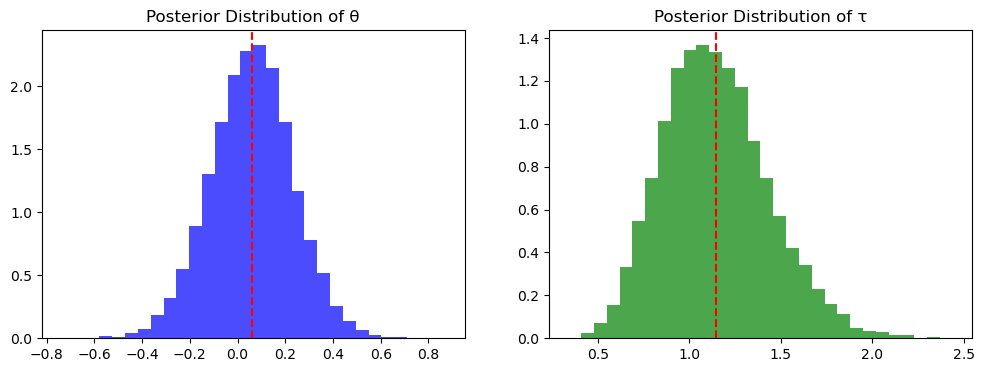

In [2]:
import numpy as np
from scipy.stats import gamma, norm
import matplotlib.pyplot as plt

# Data
n = 30
m, s = 0, 1  # True mean and std deviation for generating x
x = norm(loc=m, scale=s).rvs(size=n)

# Hyperparameters
theta_0, tau_0 = 0, 1  # Prior for theta
alpha, lambd = 2, 1    # Prior for tau

# Gibbs Sampler
C, G = 2, 10000  # Chains, Gibbs samples
theta = np.zeros([C, G])
tau = np.zeros([C, G])
theta[:, 0] = 1000  # Initial value for theta

x_bar = np.mean(x)

for c in range(C):  # For each chain
    for g in range(1, G):  # For each Gibbs iteration
        # Update tau
        alpha_post = (n + alpha) / 2
        beta_post = (np.sum((x - theta[c, g - 1]) ** 2) + lambd) / 2
        tau[c, g] = gamma(a=alpha_post, scale=1 / beta_post).rvs()
        
        # Update theta
        var_theta = 1 / (tau[c, g] * (n + tau_0))
        mean_theta = (n * x_bar + tau_0 * theta_0) / (n + tau_0)
        theta[c, g] = norm(loc=mean_theta, scale=np.sqrt(var_theta)).rvs()

# Results
burn_in = 2000
theta_samples = theta[:, burn_in:].flatten()
tau_samples = tau[:, burn_in:].flatten()

# Posterior summaries
theta_mean = np.mean(theta_samples)
theta_credible = np.percentile(theta_samples, [2.5, 97.5])
tau_mean = np.mean(tau_samples)
tau_credible = np.percentile(tau_samples, [2.5, 97.5])

print(f"Posterior θ: Mean={theta_mean}, 95% CI={theta_credible}")
print(f"Posterior τ: Mean={tau_mean}, 95% CI={tau_credible}")

# Plot posterior distributions
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(theta_samples, bins=30, density=True, color='blue', alpha=0.7)
plt.title("Posterior Distribution of θ")
plt.axvline(theta_mean, color='red', linestyle='--')

plt.subplot(1, 2, 2)
plt.hist(tau_samples, bins=30, density=True, color='green', alpha=0.7)
plt.title("Posterior Distribution of τ")
plt.axvline(tau_mean, color='red', linestyle='--')
plt.show()


A larger value o f $\alpha$ and $\lambda$ indicates larger reliance on the prior, and the posterior distribution will be closer to the prior value, and vice versa

Q3

If the prior is a proper distribution, the posterior is proportional to the product of the likelihood and prior


To identify the posterior’s exact distribution:

1. Joint Simplification: Write the joint distribution 

2. p(x,θ)=p(x∣θ)p(θ), combine terms, and search for familiar functional forms.
Normalizing Constant: Introduce a normalizing constant so that the posterior integrates to 1. This is often trivial for conjugate priors since the posterior's form is pre-determined.

Instead of worrying about analytic derivations, we can use samples to generate histograms, compute credible intervals, and make probabilistic statements about parameters.